# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.232848e+01     1.348894e+01
 * time: 0.00386810302734375
     1     6.086100e+01     8.156570e+00
 * time: 0.011046171188354492
     2     5.520578e+01     1.052085e+01
 * time: 0.027698040008544922
     3     3.864895e+01     7.303525e+00
 * time: 0.050137996673583984
     4     2.729537e+01     6.624909e+00
 * time: 0.07227206230163574
     5     1.752269e+01     3.528843e+00
 * time: 0.09180903434753418
     6     1.134421e+01     2.585176e+00
 * time: 0.18120908737182617
     7     9.483146e+00     6.340335e+00
 * time: 0.19501996040344238
     8     8.094499e+00     2.546503e+00
 * time: 0.2116250991821289
     9     7.092820e+00     1.834233e+00
 * time: 0.22764015197753906
    10     6.776094e+00     2.235585e+00
 * time: 0.24079298973083496
    11     6.533147e+00     1.835839e+00
 * time: 0.2537219524383545
    12     6.304992e+00     1.706215e+00
 * time: 0.2699451446533203
    13     6.249042e+00     1.952624e+00
 * time:

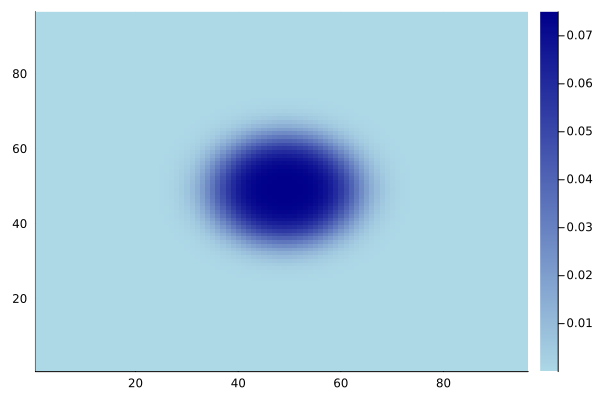

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)